<a href="https://www.kaggle.com/code/swapnajak/dataanalyst-salary-eda-python?scriptVersionId=173573190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # EDA-Data Analyst/Scientist job Salaries 

# # Business Problem: 
 > **Business user of Staffing and Recruiting Company in Data Analytics sector intrested to discover "Revenue forecating".To estimate their future income they wants to know the insights ,tends and patterns from available data collected from various sources. To do this,As a Data Analyst ,we need to analyze the past data and plan their budget ,resources and strategies for their growth in upcoming year**.


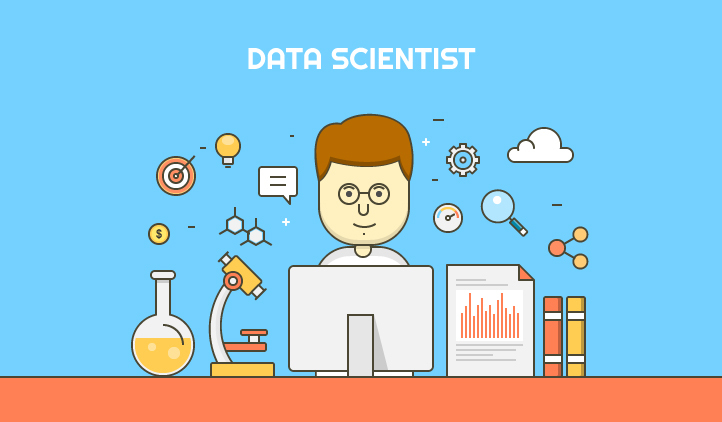

Investigation can be  perceive through EDA(Exploratory data analysis). As a Data Analyst ,I need to acess and analyse the historical data provided by comapny and I will be accountable to  analyze and investigate data sets and summarize their main characteristics,data visualization to share insights to Business User.
   First step can be achieved through finding out summary from Data. 

# 1. plan

<font size=3>
  To start with first step of the project we have to plan things  to perform analysis to ensure the results we produce are valid and applicable to any desired business outcomes and goals
    
      First, We have to access dataset of Data Scientist job salaries and find out the summary statistics.Here we have data with details like year, job_title,job_category ,Experinece, work_location and salary .
    
     Here we are exploring evey feature of data set to analze data it  in different prespective to better understand patterns within the data, detect outliers or anomalous events and find interesting relations among the variables.

# 2.Analyze

**To start Analysis we are using  jupyter notebook with Python **

Jupyter Notebook: Cloud based Kaggle Notebook 

Python :An interpreted, object-oriented programming language with dynamic semantics. Its high-level, built-in data structures. Python and EDA can be used together to identify missing values in a data set, which is important so you can decide how to handle missing values for machine learning

## 2.1 Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS

# 2.2 Load Dataset

In [2]:
df=pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
df.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700,138700,United States,Mid-level,Full-time,In-person,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M


# 2.3 Understand Dataset

Here in this Dataset we have data for past three years for different job roles under various job catyegories worldwide.

  We also have details of different salries paid at differnt job_locations according to position and Experience_Level employee have. Also in considerations , some other key fileds like company_size and  work_setting like Remeote,on_sight or Hybrid
                
  In addition to that we also need to consider salary paid in USD at differnt locations so we will consider salary  paid in USD globally.
Employment Type also will be part of Analysis to find out the market requirement of Employment Type.

  To summarize we have access,clean,Analyse data to perform Exploratory Data Analysis (EDA) .
                



1.**Work_year**-  year of recording data

2.**Experience_level**- Experience level of employee (Entry,Mid,Senior,Executive)

3.'**employment_type**'-Type of Employment (Full-time ,Part-time,Free Lancer)

4.'**job_title**'- job title of job in Analytics (Data Engineer,Data Analyst,Data Sceintist..)

5.'**salary**'- salary amount 

6.'**salary_currency**' -currency of salary paid in different countires

7.'**salary_in_usd**'- salary in US Dollars

8.**'employee_residence**'-Employee Resident country

9.'**work_setting**'- work type 

10.**'company_location**'-company loacation country

11.'**company_size**'-size of the company

12.'**job_category**'- Main category of job 
******

## 2.4 Find out columns,Size of Data and Data Type

In [3]:
df.shape

(9355, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

## Check Null values

In [6]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

## 2.5 Initial Summary Statistics

## Univariate Analysis

  ### Categorical_columns
         'job_title', 
         'job_category', 
         'salary_currency',
         'employee_residence',
         'experience_level',
         'employment_type', 
         'work_setting',
         'company_location', 
         'company_size
 
 
 ###    Numerical Columns
          work_year
          salary
          salary_in_usd


In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


# 3.Analysis

* # 3.1 Job Analysis  

Here We have to perform job analysis to gain insights from data.
Find out what was the market requirement in past years and which job_category and job_title was in highest in demand in terms of

count of job openings,
highest paid salaries
differnt level of experience
differnt work locations in world

# Job Category Count Year wise

This will explain count of jobs avilable yearly

In [8]:
Jobcategory_yearcount=df.groupby(['work_year','job_category']).agg({'job_category':'count'})
Jobcategory_yearcount

job_category
work_year job_category                                
2020      Data Analysis                             15
          Data Engineering                          17
          Data Science and Research                 29
          Machine Learning and AI                   10
2021      Data Analysis                             28
          Data Architecture and Modeling             5
          Data Engineering                          45
          Data Management and Strategy               1
          Data Science and Research                 72
          Leadership and Management                  9
          Machine Learning and AI                   37
2022      BI and Visualization                       8
          Cloud and Database                         2
          Data Analysis                            289
          Data Architecture and Modeling            46
          Data Engineering                         499
          Data Management and Strategy              12
          Data Quality and Operations               12
          Data Science and Research                500
          Leadership and Management                 80
          Machine Learning and AI                  186
2023      BI and Visualization                     305
          Cloud and Database                         3
          Data Analysis                           1125
          Data Architecture and Modeling           208
          Data Engineering                        1699
          Data Management and Strategy              48
          Data Quality and Operations               43
          Data Science and Research               2413
          Leadership and Management                414
          Machine Learning and AI                 1195

# Job Category Count yearly in Wordcloud(NLP)

In [9]:
text=df['job_title'].str.cat(sep=',')
text

'Data DevOps Engineer,Data Architect,Data Architect,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Machine Learning Researcher,Machine Learning Researcher,Data Engineer,Data Engineer,Machine Learning Engineer,Machine Learning Engineer,Data Scientist,Data Scientist,Data Analyst,Data Analyst,Data Scientist,Data Scientist,Analytics Engineer,Analytics Engineer,Machine Learning Engineer,Machine Learning Engineer,Data Analyst,Data Analyst,Machine Learning Engineer,Machine Learning Engineer,Applied Scientist,Applied Scientist,Machine Learning Engineer,Machine Learning Engineer,BI Developer,BI Developer,Data Engineer,Data Engineer,Business Intelligence Engineer,Business Intelligence Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Analyst,Data Analyst,Machine Learning Engineer,Machine Learning Engineer,Research Scientist,Research Scientist,Data Scientist,Data Scientist,Data Engineer,Data Engineer,Data Scientist,Data Scientist,Research Analyst,Research Analyst,

This Graph will show highest count job profile in highest text Size 

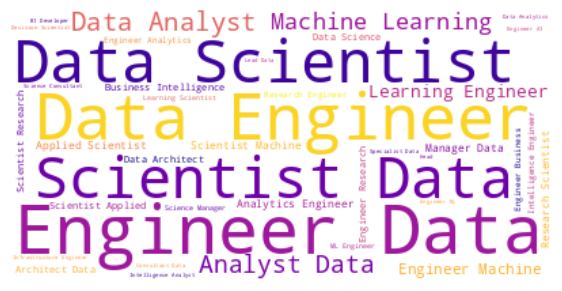

In [10]:
plt.rcParams["figure.figsize"] = (7,6)
stopwords = set(STOPWORDS)
# Make Wordcloud
wordcloud = WordCloud(max_font_size=80, max_words=40, background_color="white",stopwords=stopwords, colormap='plasma').generate(text)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
     

# Top5 jobs openings in Market

In [11]:
job_categoryTop5count=df['job_category'].value_counts()[:5]
job_categoryTop5count

job_category
Data Science and Research    3014
Data Engineering             2260
Data Analysis                1457
Machine Learning and AI      1428
Leadership and Management     503
Name: count, dtype: int64

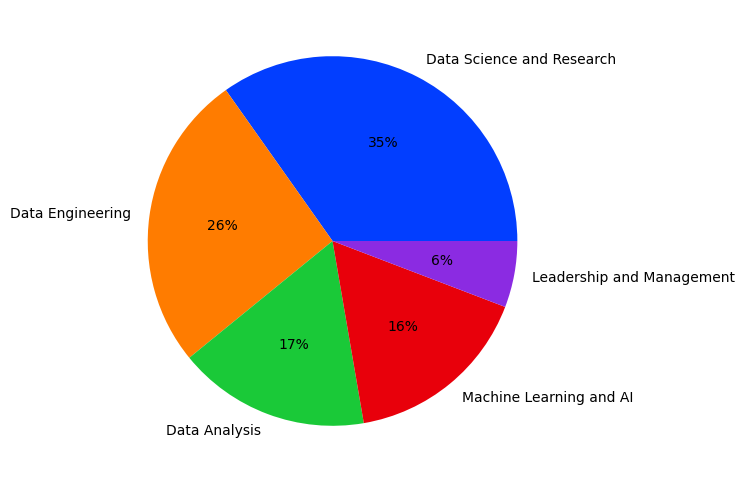

In [12]:
data = job_categoryTop5count.values
keys = job_categoryTop5count.keys() 
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

# Job category- Yearly Mean Salary

In [13]:
sal_byJobcategory=df.sort_values(['salary_in_usd']).groupby(['work_year','job_category'])['salary_in_usd'].mean().reset_index()
sal_byJobcategory

,work_year,job_category,salary_in_usd
0,2020,Data Analysis,68014.666667
1,2020,Data Engineering,94575.823529
2,2020,Data Science and Research,129538.827586
3,2020,Machine Learning and AI,113276.400000
4,2021,Data Analysis,87818.500000
5,2021,Data Architecture and Modeling,169940.600000
6,2021,Data Engineering,107192.288889
7,2021,Data Management and Strategy,165000.000000
8,2021,Data Science and Research,107517.819444
9,2021,Leadership and Management,131892.888889


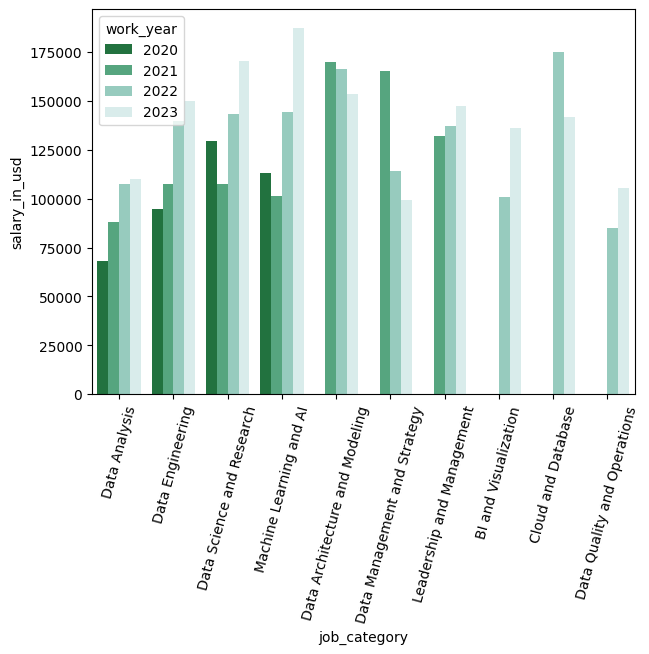

In [14]:
fig=plt.figure(figsize=(7,5))
sns.barplot(sal_byJobcategory,x='job_category',y='salary_in_usd',hue='work_year',dodge='bool',palette = "BuGn_r")
plt.xticks(rotation=75)
fig.show()

# 2.Job Title Wise Mean Salary

In [15]:
JobTitle_sal=df.groupby('job_title')['salary_in_usd'].mean()
Top10JobTitle_sal=JobTitle_sal.sort_values(ascending=False)
key=Top10JobTitle_sal[::10].keys()
val=Top10JobTitle_sal[::10].values
Top10JobTitle_sal

job_title
Analytics Engineering Manager     399880.000
Data Science Tech Lead            375000.000
Managing Director Data Science    300000.000
Head of Machine Learning          259000.000
AWS Data Architect                258000.000
                                     ...    
Data Management Analyst            56000.000
Data Operations Specialist         55355.000
Machine Learning Specialist        55000.000
Insight Analyst                    47673.875
Compliance Data Analyst            45000.000
Name: salary_in_usd, Length: 125, dtype: float64

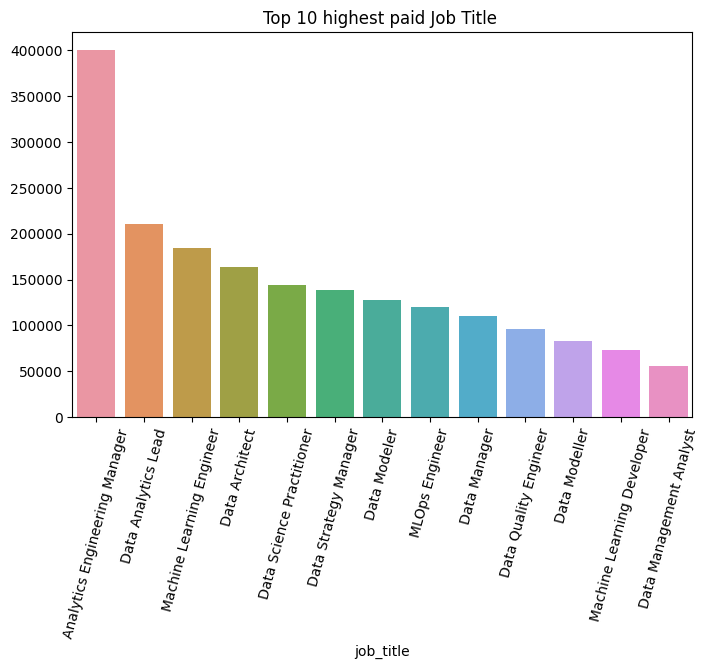

In [16]:
Top10JobTitle_sal=Top10JobTitle_sal[::10]
fig=plt.figure(figsize=(8,5))
sns.barplot(x=key, y=val)
plt.xticks(rotation=75)
plt.title("Top 10 highest paid Job Title ")
fig.show()

# # 3.2 Salary Analysis 

# Year wise Salary Analysis by Experince Level

In [17]:
Exp_employmenttype=df.groupby(['work_year','experience_level'])['salary_in_usd'].mean().round(2,).reset_index()
Exp_employmenttype

,work_year,experience_level,salary_in_usd
0,2020,Entry-level,71248.25
1,2020,Executive,179958.25
2,2020,Mid-level,95578.72
3,2020,Senior,144489.89
4,2021,Entry-level,69370.12
5,2021,Executive,186128.00
6,2021,Mid-level,92640.92
7,2021,Senior,132104.36
8,2022,Entry-level,81981.96
9,2022,Executive,191059.08


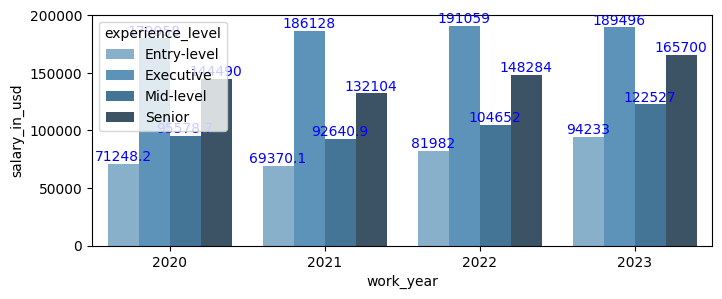

In [18]:
fig=plt.figure(figsize=(8,3))
ax=sns.barplot(data=Exp_employmenttype,x='work_year',y='salary_in_usd',hue='experience_level',errwidth=0,palette = "Blues_d")
for i in ax.containers:
    ax.bar_label(i,color='blue')
plt.show()

# Year wise Salary Analysis by Location

In [19]:
salaryby_loc = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
salaryby_loc

,company_location,salary_in_usd
0,Algeria,100000.000000
1,American Samoa,50000.000000
2,Andorra,50745.000000
3,Argentina,62000.000000
4,Armenia,50000.000000
...,...,...
65,Turkey,22313.600000
66,Ukraine,121333.333333
67,United Arab Emirates,100000.000000
68,United Kingdom,104447.233853


In [20]:
import plotly.express as px
data=df['company_location']
data

fig = px.scatter_geo(data,
                     hover_name=data , size_max=10,
                     title='Locations Around the World')
fig.show()